# Homework-1: Softmax for MNIST Classification

### In this homework, you need to
- ### implement and apply a softmax classifier to perform digits classification.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load MNIST Dataset
The **mnist_data_loader.py** is a script to load mnist dataset, which is included in [TensorFlow tutorial](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py).

In [2]:
import mnist_data_loader

mnist_dataset = mnist_data_loader.read_data_sets("../DataSet/MNIST_data/", one_hot=True)

# training dataset
train_set = mnist_dataset.train
# test dataset
test_set = mnist_dataset.test

train_size = train_set.num_examples
test_size = test_set.num_examples
print()
print('Training dataset size: ', train_size)
print('Test dataset size: ', test_size)

Instructions for updating:
non-resource variables are not supported in the long term
Extracting ../DataSet/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../DataSet/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../DataSet/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../DataSet/MNIST_data/t10k-labels-idx1-ubyte.gz

Training dataset size:  60000
Test dataset size:  10000


## Data Example
To have a better understand of MNIST dataset, we can visualize some examples in MNIST.

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


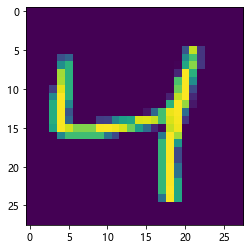

In [3]:
# You can choose any image in training set to visualize, example_id ∈ [0,60000)
example_id = 2

image = train_set.images[example_id]  # shape = 784 (28*28)
label = train_set.labels[example_id]  # shape = 10
#print(image)
print(label)
plt.imshow(np.reshape(image, [28, 28]))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [4]:
batch_size = 100
max_epoch = 10
learning_rate = 0.001

# For regularization
lamda = 0.3

### TODO
Before executing the following code, you should accomplish **./softmax_classifier.py**.

In [5]:
from softmax_classifier import softmax_classifier, load_pred_images

## Train

In [6]:
import torch
import numpy

# Weight Initialization
W = np.random.randn(28 * 28, 10) * 0.01
W = torch.from_numpy(W).to(torch.float32)
loss_set = []
accu_set = []
disp_freq = 100

for epoch in range(0, max_epoch):
    iter_per_batch = train_size // batch_size
    for batch_id in range(0, iter_per_batch):
        batch = train_set.next_batch(batch_size)  # get data of next batch
        input, label = batch
        # 全部换为tensor类型
        input = torch.from_numpy(input).to(torch.float32)
        label = torch.from_numpy(label).to(torch.float32)
        # softmax_classifier
        loss, gradient, prediction = softmax_classifier(W, input, label, lamda)
        # Calculate accuracy
        label = np.argmax(label, axis=1)  # scalar representation
        accuracy = sum(numpy.array(prediction) == numpy.array(label)) / float(len(label))

        loss_set.append(loss)
        accu_set.append(accuracy)

        # Update weights
        W = torch.from_numpy(np.asarray(W))
        W = W - (learning_rate * gradient)
        if batch_id % disp_freq == 0:
            print("Epoch [{}][{}]\t Batch [{}][{}]\t Training Loss {:.4f}\t Accuracy {:.4f}".format(
                epoch, max_epoch, batch_id, iter_per_batch,
                loss, accuracy))
    print()

D:\JetBrains\workplace\PyCharm-P\DeepLearning\01-手写数字识别实现-Softmax\softmax_classifier.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


Epoch [0][10]	 Batch [0][600]	 Training Loss 2.4493	 Accuracy 0.0900
Epoch [0][10]	 Batch [100][600]	 Training Loss 2.3246	 Accuracy 0.2900
Epoch [0][10]	 Batch [200][600]	 Training Loss 2.2609	 Accuracy 0.5200
Epoch [0][10]	 Batch [300][600]	 Training Loss 2.1907	 Accuracy 0.5900
Epoch [0][10]	 Batch [400][600]	 Training Loss 2.0577	 Accuracy 0.7400
Epoch [0][10]	 Batch [500][600]	 Training Loss 2.0378	 Accuracy 0.6900

Epoch [1][10]	 Batch [0][600]	 Training Loss 1.9194	 Accuracy 0.7900
Epoch [1][10]	 Batch [100][600]	 Training Loss 1.8907	 Accuracy 0.7800
Epoch [1][10]	 Batch [200][600]	 Training Loss 1.9035	 Accuracy 0.7000
Epoch [1][10]	 Batch [300][600]	 Training Loss 1.7858	 Accuracy 0.8100
Epoch [1][10]	 Batch [400][600]	 Training Loss 1.7958	 Accuracy 0.7100
Epoch [1][10]	 Batch [500][600]	 Training Loss 1.7492	 Accuracy 0.7300

Epoch [2][10]	 Batch [0][600]	 Training Loss 1.7314	 Accuracy 0.7900
Epoch [2][10]	 Batch [100][600]	 Training Loss 1.6412	 Accuracy 0.8500
Epoch [2][

## Test

In [7]:
correct = 0
iter_per_batch = test_size // batch_size

# Test process
for batch_id in range(0, iter_per_batch):
    batch = test_set.next_batch(batch_size)
    data, label = batch
    data = torch.from_numpy(data).to(torch.float32)
    label = torch.from_numpy(label).to(torch.float32)
    # We only need prediction results in testing
    _, _, prediction = softmax_classifier(W, data, label, lamda)
    label = np.argmax(label, axis=1)
    correct += sum(numpy.array(prediction) == numpy.array(label))

accuracy = correct * 1.0 / test_size
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.8344


## 测试

torch.return_types.max(
values=tensor([177.7742, 353.5765, 588.9417, 296.0021, 615.1517, 346.2033, 299.1132,
        654.7065, 408.6053, 652.3457]),
indices=tensor([5, 2, 0, 0, 0, 6, 8, 0, 0, 0]))


D:\JetBrains\workplace\PyCharm-P\DeepLearning\01-手写数字识别实现-Softmax\softmax_classifier.py:54: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  data = torch.Tensor(img_list).to(torch.float32).reshape(-1, 784)


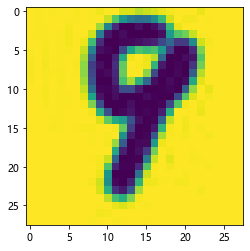

In [8]:
test_imags, result = load_pred_images(W,False)
print(result)
for index, image in enumerate(test_imags):
    image = image.numpy()
    plt.imshow(np.reshape(image, [28, 28]))
plt.show()

## Plot

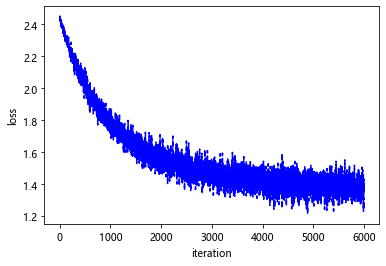

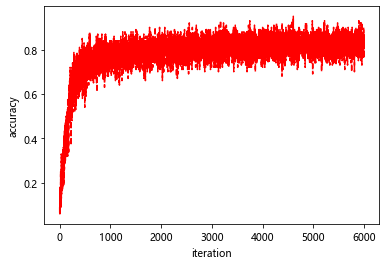

In [9]:
# training loss curve
plt.figure()
plt.plot(loss_set, 'b--')
plt.xlabel('iteration')
plt.ylabel('loss')
# training accuracy curve
plt.figure()
plt.plot(accu_set, 'r--')
plt.xlabel('iteration')
plt.ylabel('accuracy');

### You have finished homework1-softmax, congratulations!